# Testing Face Recognition

In [1]:
from keras.models import load_model
from keras.layers import Dense
import warnings

warnings.filterwarnings("ignore")
# Loading the Trained model 
model = load_model("Face_Reco_04.h5")
model.summary()
print(len(model.layers)) # Printing the number of Layers 

2023-05-28 10:21:24.691508: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-28 10:21:24.695017: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-28 10:21:24.734890: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-28 10:21:24.735450: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-28 10:21:25.442695: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

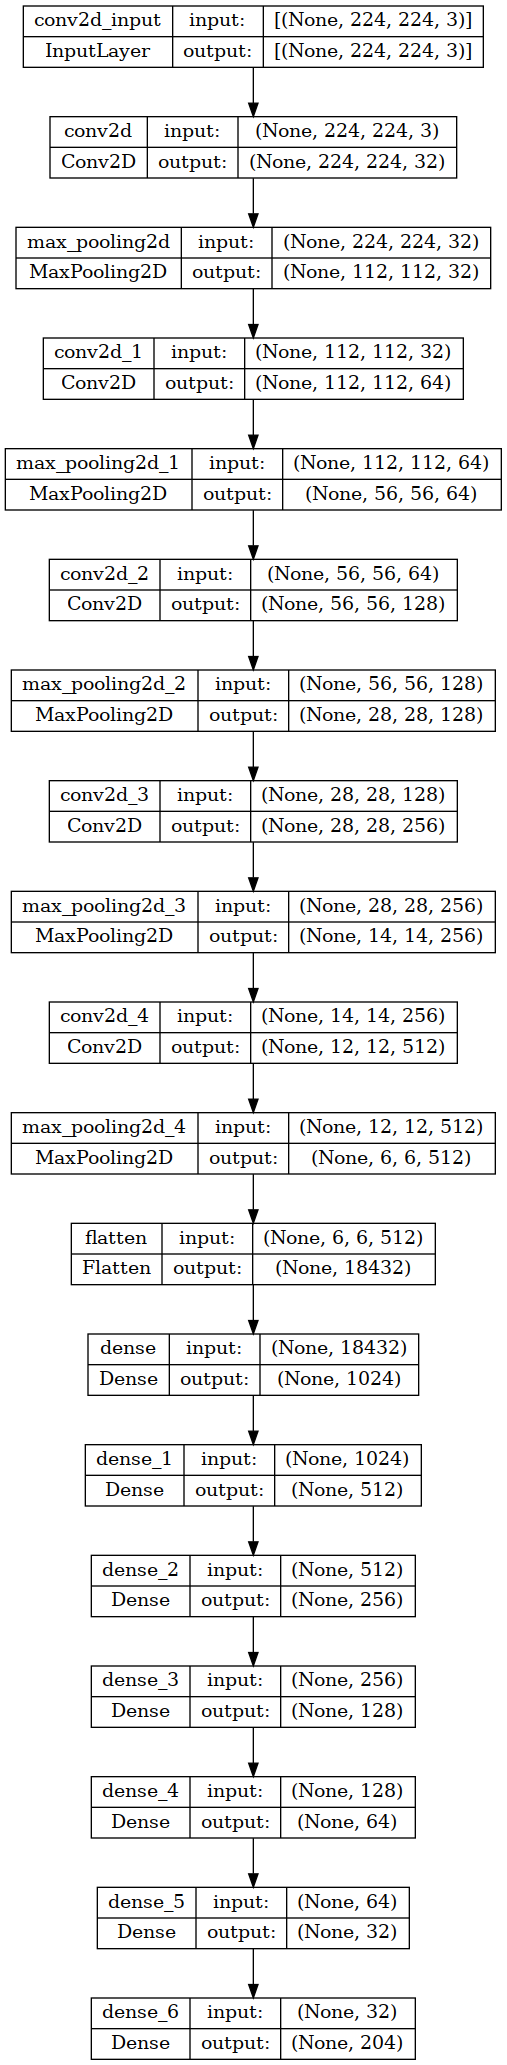

In [2]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

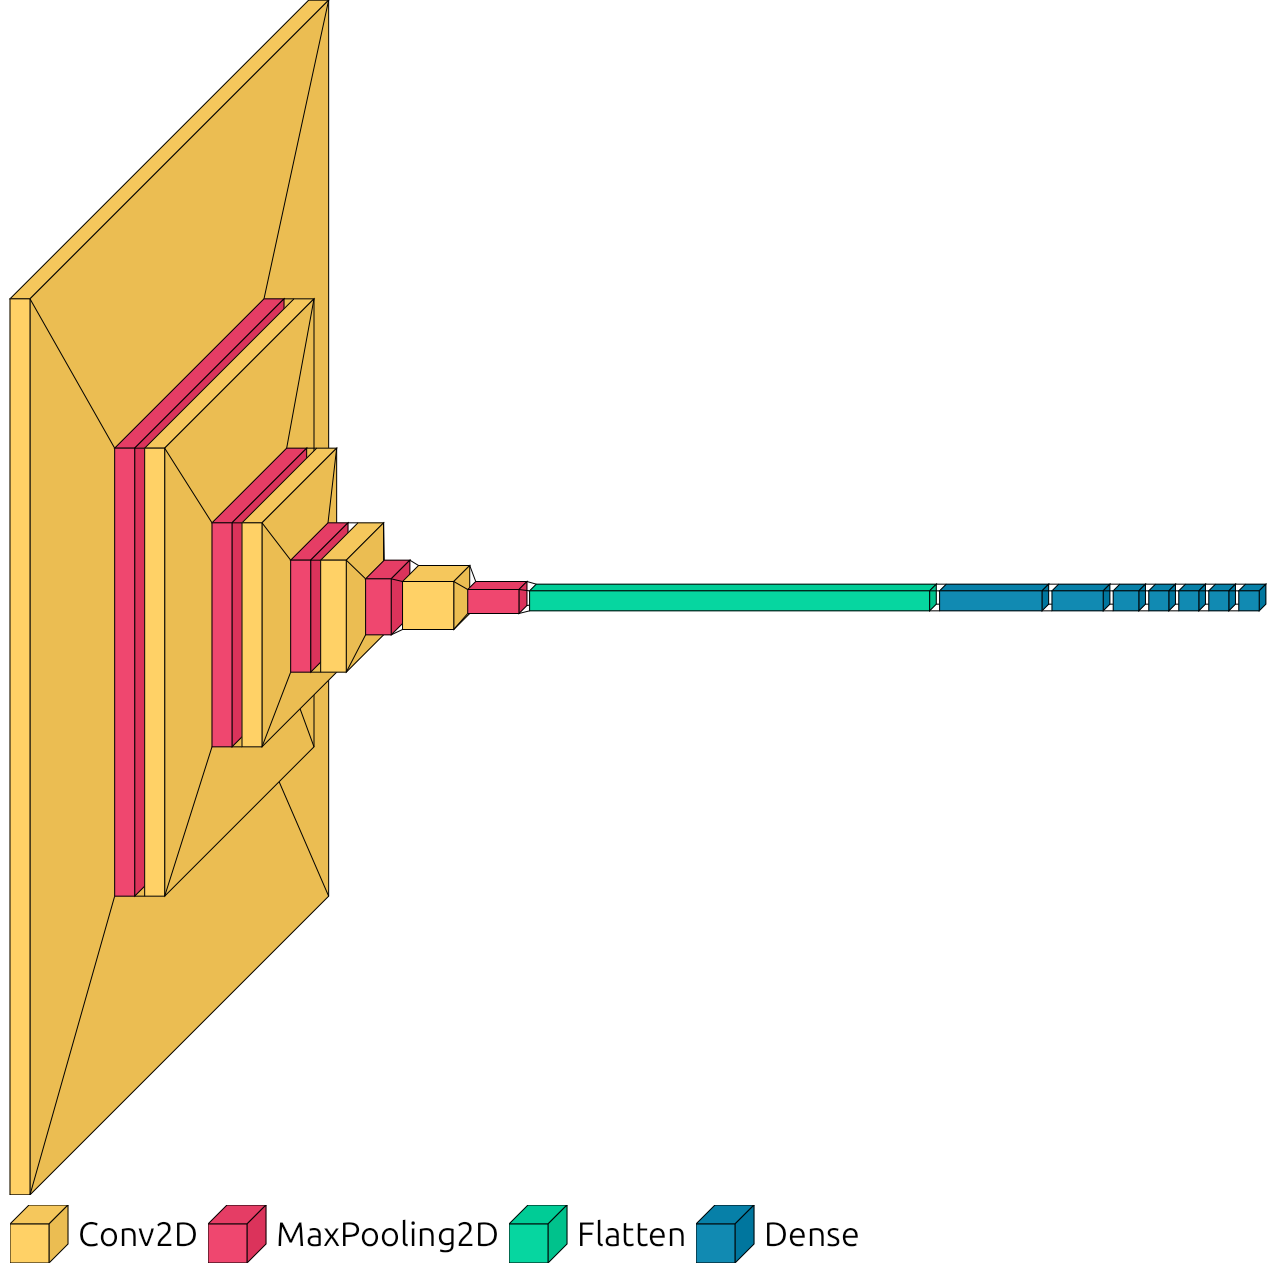

In [21]:
import visualkeras

visualkeras.layered_view(model, legend=True) # without custom font
from PIL import ImageFont
font = ImageFont.truetype("Ubuntu-R.ttf", 34)
visualkeras.layered_view(model, legend=True, font=font) # selected font

In [4]:
# Loading the labels of Trained model
import pickle
ResultMap = {}
with open("ResultsMap.pkl", 'rb') as f:
    ResultMap = pickle.load(f)

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

ImagePath='Faces/Training/n000040/0029_01.jpg'
test_image=image.load_img(ImagePath,target_size=(224, 224))
test_image=image.img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)

result=model.predict(test_image,verbose=0)
#print(training_set.class_indices)

print('Prediction is: ',ResultMap[np.argmax(result)])

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Removing the output layer from the pre-trained model
model.pop()
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [3]:
# Creating Dataset [ Augmentation Techniques Applied ]
# 80% Training
# 20% Testing
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        validation_split=0.2,)
test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
)

training_set = train_datagen.flow_from_directory(
        "Dataset/",
        target_size=(224, 224),
        batch_size=8,
        class_mode='categorical',
        subset='training')

test_set = test_datagen.flow_from_directory(
        "Dataset/",
        target_size=(224, 224),
        batch_size=8,
        class_mode='categorical',
        subset='validation')


Found 405 images belonging to 5 classes.
Found 99 images belonging to 5 classes.


In [4]:
# Label Preparation 
TrainClasses=training_set.class_indices

ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName

import pickle
with open("ResultsMap_final.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)

print("Mapping of Face and its ID",ResultMap)

OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: '2SD19CS071', 1: '2SD19CS076', 2: '2SD19CS123', 3: '2SD19IS122', 4: '2SD19ME033'}

 The Number of output neurons:  5


In [5]:
# Adding new output Layer to Pre-trained Model
from keras.layers import Dense
# model.add(Dense(64, activation="relu", name="newLyr11"))
# model.add(Dense(32, activation="relu", name="newLyr22"))
model.add(Dense(OutputNeurons, activation="softmax", name="output"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [6]:
# Making 11 Layers as not trainable because they are trained using large dataset to optimize weights
# Transfer learning
print("Non Trainable layers are ->")  
for layer in model.layers[:11]:
    print(layer.name)
    layer.trainable = False
print("")
print("#######################################")
print()
print("Trainable Layers are ->")
for layer in model.layers[11:]:
    print(layer.name)
    layer.trainable = True

Non Trainable layers are ->
conv2d
max_pooling2d
conv2d_1
max_pooling2d_1
conv2d_2
max_pooling2d_2
conv2d_3
max_pooling2d_3
conv2d_4
max_pooling2d_4
flatten

#######################################

Trainable Layers are ->
dense
dense_1
dense_2
dense_3
dense_4
dense_5
output


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

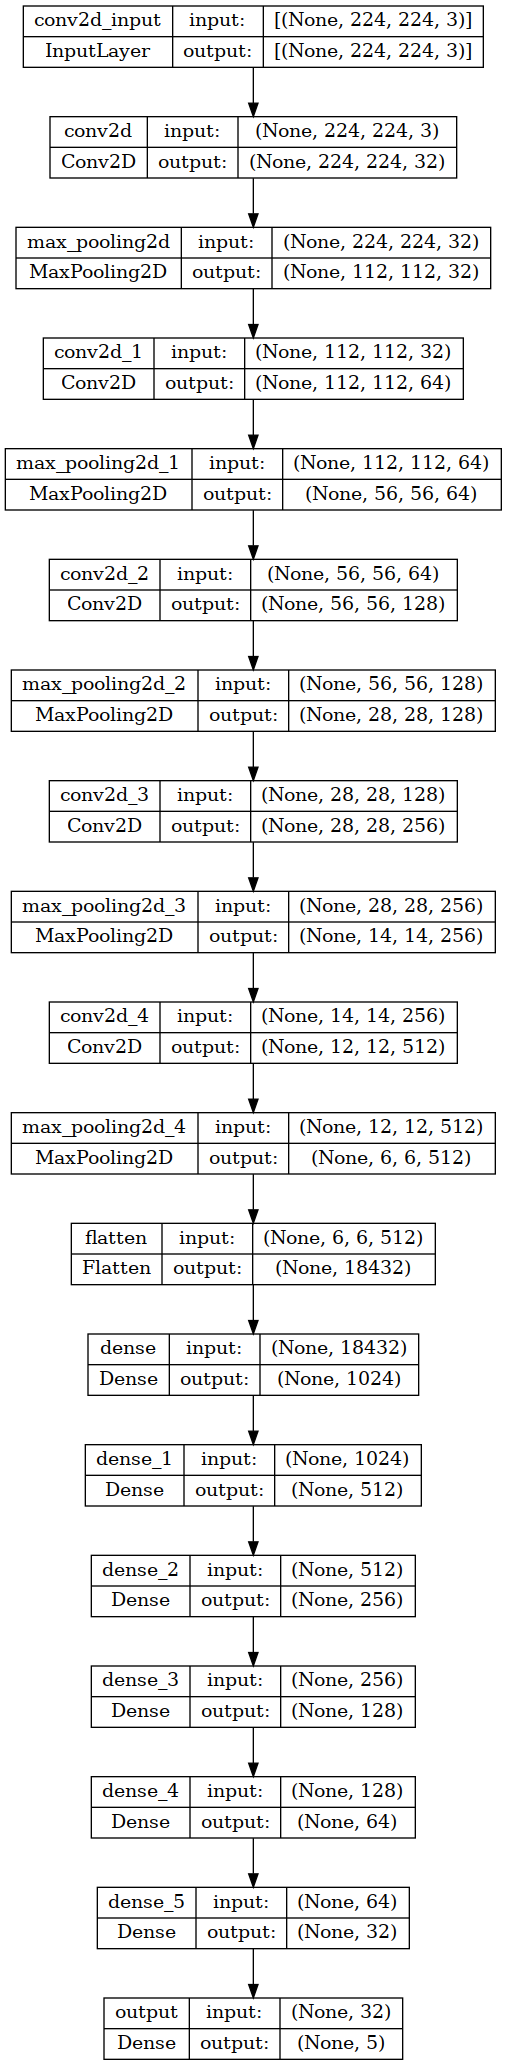

In [11]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

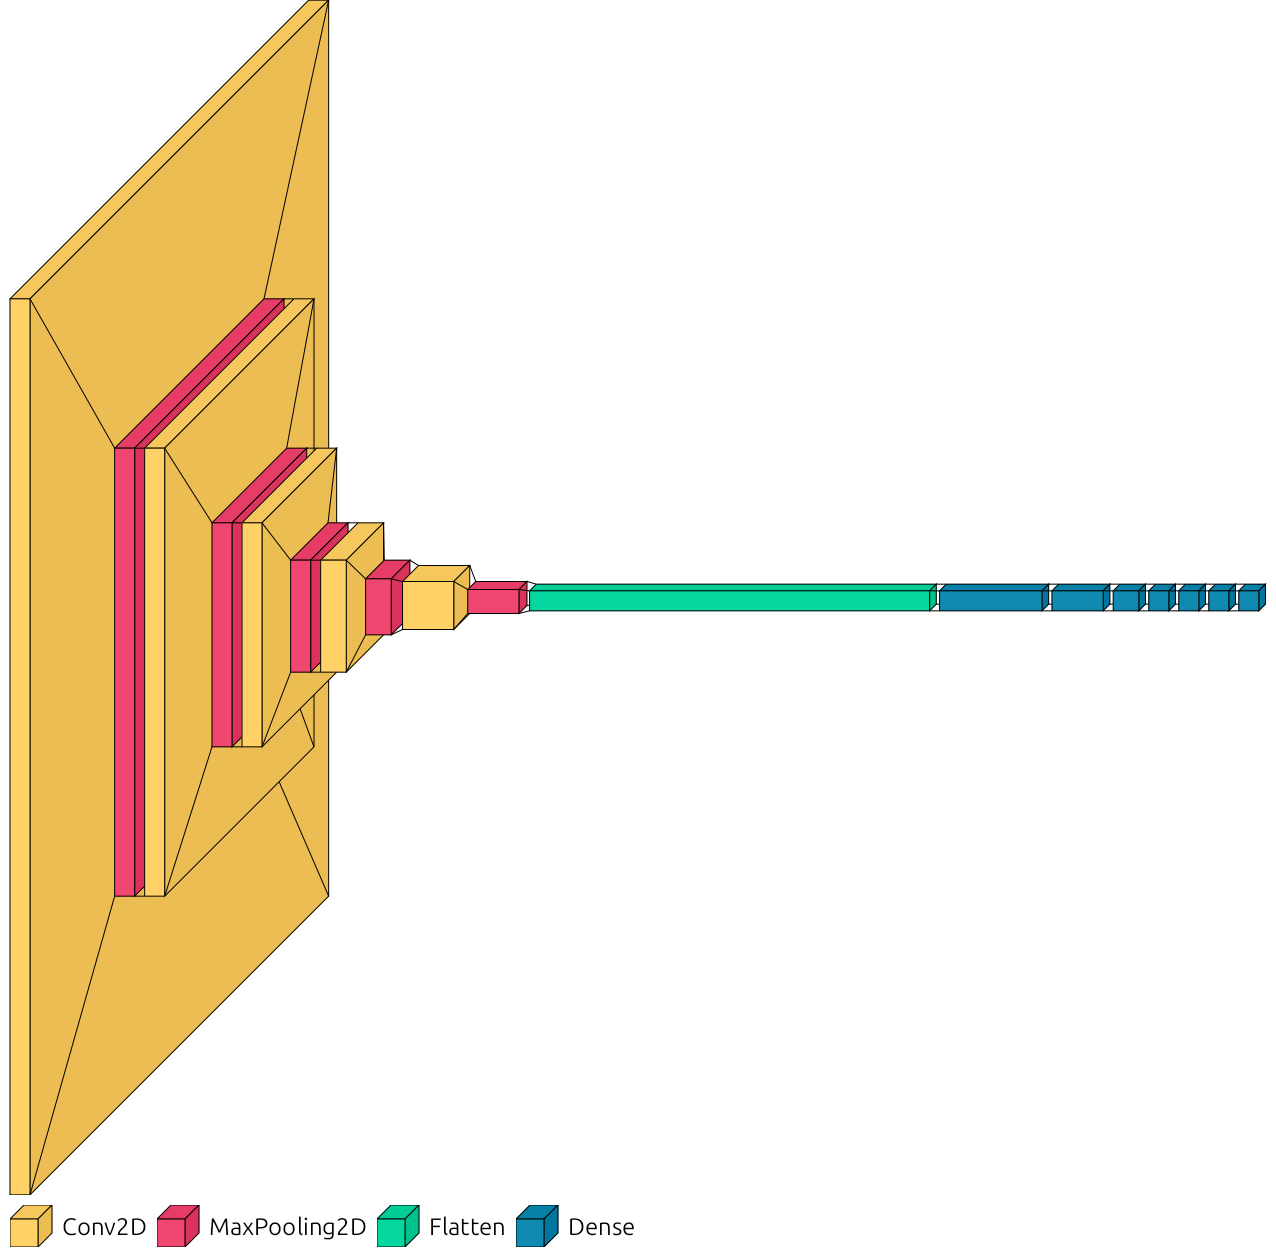

In [14]:
import visualkeras

visualkeras.layered_view(model, legend=True) # without custom font
from PIL import ImageFont
font = ImageFont.truetype("Ubuntu-R.ttf", 24)
visualkeras.layered_view(model, legend=True, font=font) # selected font

In [7]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
from keras.callbacks import EarlyStopping

num_epochs = 10
early_stop = EarlyStopping(monitor='val_loss', patience=3, mode='auto', restore_best_weights=True)
history = model.fit(training_set, epochs=num_epochs, validation_data=test_set, callbacks = [early_stop], verbose=1)

Epoch 1/10


2023-05-28 10:22:11.442631: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


51/51 [==============================] - ETA: 0s - loss: 2.3875 - accuracy: 0.8099

2023-05-28 10:22:32.818294: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


51/51 [==============================] - 24s 446ms/step - loss: 2.3875 - accuracy: 0.8099 - val_loss: 0.3467 - val_accuracy: 0.9697
Epoch 2/10
51/51 [==============================] - 22s 436ms/step - loss: 0.0338 - accuracy: 0.9852 - val_loss: 0.4860 - val_accuracy: 0.9394
Epoch 3/10
51/51 [==============================] - 22s 440ms/step - loss: 0.0147 - accuracy: 0.9951 - val_loss: 0.4666 - val_accuracy: 0.9394
Epoch 4/10
51/51 [==============================] - 22s 437ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.6689 - val_accuracy: 0.9697


In [9]:
model.evaluate(test_set)

2023-05-28 10:23:53.913760: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


13/13 [==============================] - 2s 154ms/step - loss: 0.3467 - accuracy: 0.9697


[0.3466941714286804, 0.9696969985961914]

In [10]:
model.save("final_09.h5")

#### Test - 1

In [2]:
from keras.models import load_model

model = load_model("final_08.h5")
model.summary()

# Loading the labels of Trained model
import pickle
ResultMap = {}
with open("ResultsMap_final.pkl", 'rb') as f:
    ResultMap = pickle.load(f)

2023-05-26 23:54:50.581763: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-26 23:54:50.654540: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-26 23:54:50.946739: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-26 23:54:50.949455: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-26 23:54:52.360168: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

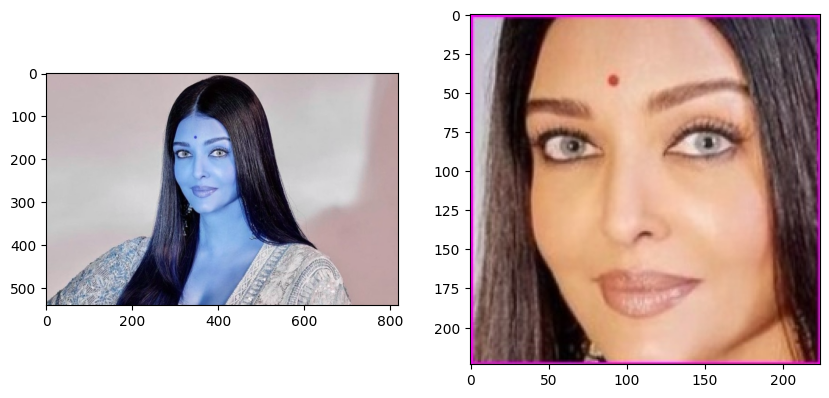

In [13]:
# Preprocessing Test Image
import numpy as np
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10,10))


facecascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

sample = 'Images/test_01_ASH.jpeg'
img_clr = cv2.imread(sample)
figure.add_subplot(2,2,1)
plt.imshow(img_clr)
img_gry = cv2.cvtColor(img_clr, cv2.COLOR_BGR2GRAY)

img_clr = np.array(img_clr)
img_gry = np.array(img_gry)

faces = facecascade.detectMultiScale(
       img_gry, scaleFactor=1.3, minNeighbors=5)

for (x_, y_, w, h) in faces:
    face_detect = cv2.rectangle(img_clr,
                                    (x_, y_),
                                    (x_+w, y_+h),
                                    (255, 0, 255), 2)

    size = (224, 224)

    roi = img_clr[y_: y_ + h, x_: x_ + w]

    resized_image = cv2.resize(roi, size)
    image_array = np.array(resized_image)

    # os.remove(path+person+"/"+sample)

    cv2.imwrite("Images/"+"Mod_test_img.jpeg", image_array)


test_img = image.load_img("Images/Mod_test_img.jpeg", target_size=(224, 224))
figure.add_subplot(2,2,2)
plt.imshow(test_img)
test_image = image.img_to_array(test_img)

test_image = np.expand_dims(test_image, axis=0)


In [15]:
test_image.shape

(1, 224, 224, 3)

In [ ]:
# Testing For Sample Image 

result = model.predict(test_image, verbose=0)

res = ResultMap[np.argmax(result)]

# Printing the Result
plt.title(res)
plt.imshow(test_img)

### Test - 2

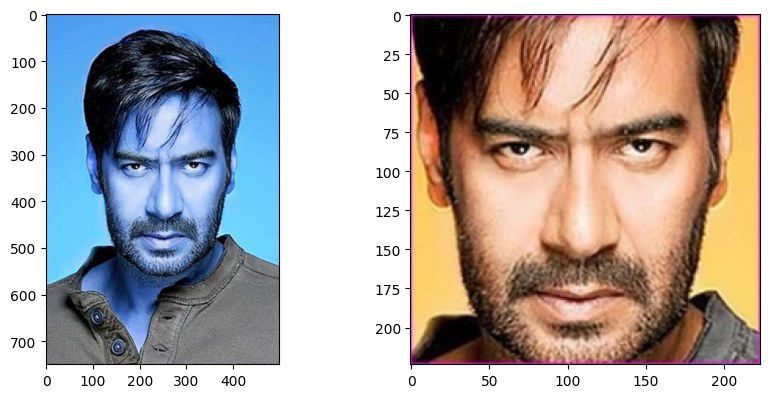

In [22]:
# Preprocessing Test Image
import numpy as np
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10,10))


facecascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

sample = 'Images/Test_02_AjayDEvgan.jpg'
img_clr = cv2.imread(sample)
figure.add_subplot(2,2,1)
plt.imshow(img_clr)
img_gry = cv2.cvtColor(img_clr, cv2.COLOR_BGR2GRAY)

img_clr = np.array(img_clr)
img_gry = np.array(img_gry)

faces = facecascade.detectMultiScale(
       img_gry, scaleFactor=1.3, minNeighbors=5)

for (x_, y_, w, h) in faces:
    face_detect = cv2.rectangle(img_clr,
                                    (x_, y_),
                                    (x_+w, y_+h),
                                    (255, 0, 255), 2)

    size = (224, 224)

    roi = img_clr[y_: y_ + h, x_: x_ + w]

    resized_image = cv2.resize(roi, size)
    image_array = np.array(resized_image)

    # os.remove(path+person+"/"+sample)

    cv2.imwrite("Images/"+"Mod_test_img_01.jpg", image_array)


test_img = image.load_img("Images/Mod_test_img_01.jpg", target_size=(224, 224))
figure.add_subplot(2,2,2)
plt.imshow(test_img)
test_image = image.img_to_array(test_img)

test_image = np.expand_dims(test_image, axis=0)

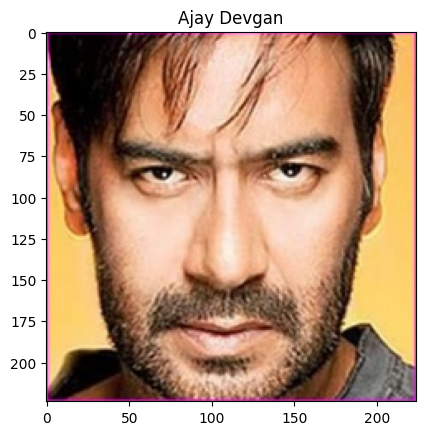

In [23]:
# Testing For Sample Image 

result = model.predict(test_image, verbose=0)

res = ResultMap[np.argmax(result)]

# Printing the Result
plt.title(res)
plt.imshow(test_img)

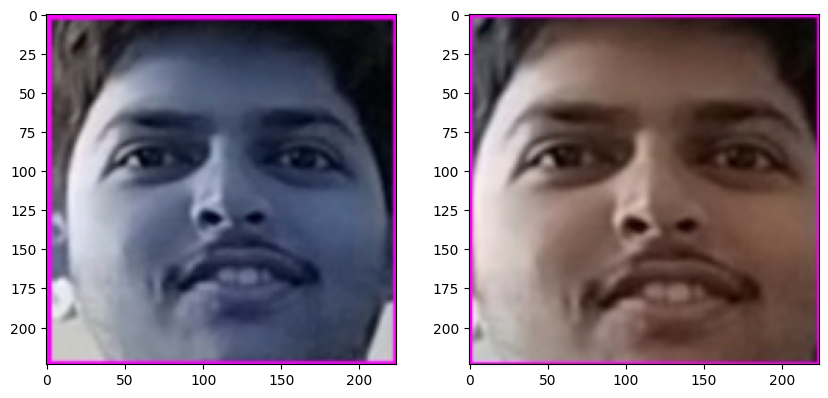

In [10]:
# Preprocessing Test Image
import numpy as np
import cv2
import numpy as np
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10,10))


facecascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

sample = 'Images2/crops/Focused/test_final.jpg'
img_clr = cv2.imread(sample)
figure.add_subplot(2,2,1)
plt.imshow(img_clr)
img_gry = cv2.cvtColor(img_clr, cv2.COLOR_BGR2GRAY)

img_clr = np.array(img_clr)
img_gry = np.array(img_gry)

faces = facecascade.detectMultiScale(
       img_gry, scaleFactor=1.3, minNeighbors=5)

for (x_, y_, w, h) in faces:
    face_detect = cv2.rectangle(img_clr,
                                    (x_, y_),
                                    (x_+w, y_+h),
                                    (255, 0, 255), 2)

    size = (224, 224)

    roi = img_clr[y_: y_ + h, x_: x_ + w]

    resized_image = cv2.resize(roi, size)
    image_array = np.array(resized_image)

    # os.remove(path+person+"/"+sample)

    cv2.imwrite("Images2/crops/Focused/"+"Mod_test_img_01.jpg", image_array)


test_img = image.load_img("Images2/crops/Focused/Mod_test_img_01.jpg", target_size=(224, 224))
figure.add_subplot(2,2,2)
plt.imshow(test_img)
test_image = image.img_to_array(test_img)

test_image = np.expand_dims(test_image, axis=0)

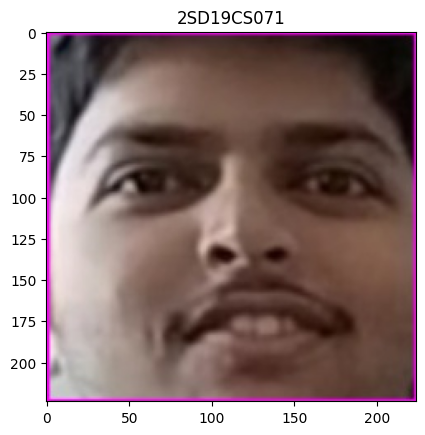

In [11]:
result = model.predict(test_image, verbose=0)

res = ResultMap[np.argmax(result)]

# Printing the Result
plt.title(res)
plt.imshow(test_img)

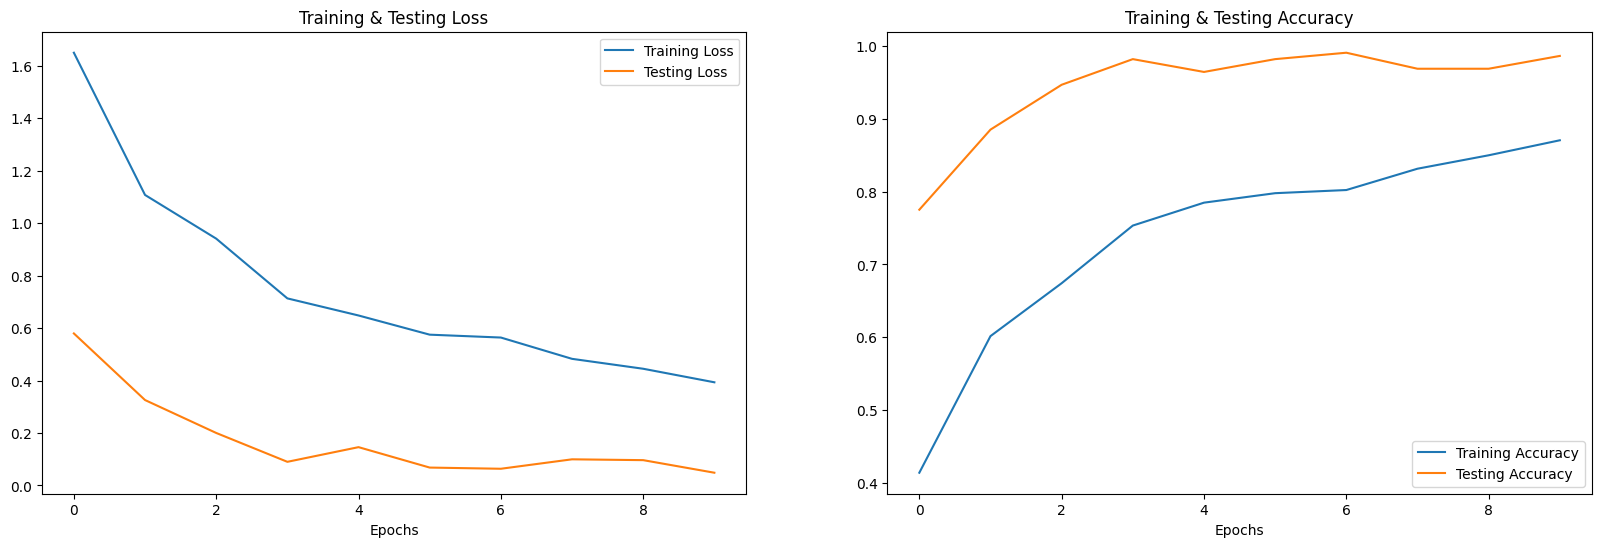

In [28]:
import matplotlib.pyplot as plt
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history['accuracy']
train_loss = history['loss']
test_acc = history['val_accuracy']
test_loss = history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [2]:
from tensorflow.keras.preprocessing import image
import os
import numpy as np
path = "Images2/crops/Focused/"
samples = os.listdir("Images2/crops/Focused/")
test_arr = []
for sample in samples:
    img = image.load_img(path+sample, target_size = (224, 224))
    test_arr.append(image.img_to_array(img))

In [3]:
test_arr = np.array(test_arr)
test_arr.shape

(6, 224, 224, 3)

In [9]:
from keras.models import load_model

model = load_model("final.h5")
result = model.predict(test_arr)

1/1 [==============================] - 1s 798ms/step


In [5]:
import pickle
ResultMap = {}
with open("ResultsMap_final.pkl", 'rb') as f:
    ResultMap = pickle.load(f)

In [6]:
for res in result:
    print(ResultMap[np.argmax(res)])

2SD19CS076
2SD19CS123
2SD19CS076
2SD19IS122
2SD19CS123
2SD19CS123


### Rough Work

In [18]:
import os
import pandas as pd
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

In [16]:
from keras_vggface.vggface import VGGFace

base_model = VGGFace(include_top=True,
    model='vgg16',
    input_shape=(224, 224, 3))
base_model.summary()

print(len(base_model.layers))
# 26 layers in the original VGG-Face


Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)     

In [17]:
base_model = VGGFace(include_top=False,
model='vgg16',
input_shape=(224, 224, 3))
base_model.summary()
print(len(base_model.layers))
# 19 layers after excluding the last few layers


58909280/58909280 [==============================] - 159s 3us/step
Model: "vggface_vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                    

In [20]:
x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)

# final layer with softmax activation
preds = Dense(5, activation='softmax')(x)



In [21]:
# create a new model with the base model's original input and the 
# new model's output
model = Model(inputs = base_model.input, outputs = preds)
model.summary()

# don't train the first 19 layers - 0..18
for layer in model.layers[:19]:
    layer.trainable = False

# train the rest of the layers - 19 onwards
for layer in model.layers[19:]:
    layer.trainable = True


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0     

In [22]:
model.compile(optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])


In [24]:
history = model.fit(training_set, validation_data=test_set, epochs=10).history

Epoch 1/10


2023-05-27 19:17:34.977892: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


18/18 [==============================] - ETA: 0s - loss: 1.4955 - accuracy: 0.3309

2023-05-27 19:17:59.442511: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


18/18 [==============================] - 28s 1s/step - loss: 1.4955 - accuracy: 0.3309 - val_loss: 1.0157 - val_accuracy: 0.7188
Epoch 2/10
18/18 [==============================] - 24s 1s/step - loss: 0.7220 - accuracy: 0.8058 - val_loss: 0.2015 - val_accuracy: 0.9375
Epoch 3/10
18/18 [==============================] - 25s 1s/step - loss: 0.1618 - accuracy: 0.9568 - val_loss: 0.1069 - val_accuracy: 0.9375
Epoch 4/10
18/18 [==============================] - 25s 1s/step - loss: 0.0561 - accuracy: 0.9856 - val_loss: 0.0481 - val_accuracy: 1.0000
Epoch 5/10
18/18 [==============================] - 26s 1s/step - loss: 0.0470 - accuracy: 0.9856 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 6/10
18/18 [==============================] - 25s 1s/step - loss: 0.0990 - accuracy: 0.9712 - val_loss: 0.3336 - val_accuracy: 0.9062
Epoch 7/10
18/18 [==============================] - 25s 1s/step - loss: 0.0298 - accuracy: 0.9928 - val_loss: 0.0734 - val_accuracy: 0.9375
Epoch 8/10
18/18 [=============

In [25]:
model.save("final.h5")